In [13]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [16]:
# Reading data from remote link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("data imported successfully")
data.head()

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
data.shape



(25, 2)

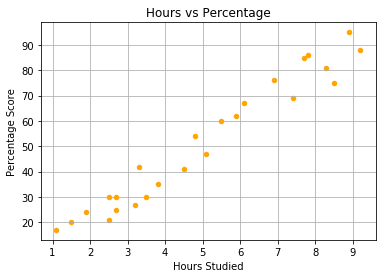

In [26]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores',kind='scatter',marker='o',color='orange')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')
plt.grid()
plt.show()


In [61]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [62]:
#Splitting the data into training and testing set
train,test = train_test_split(data, test_size = 0.25, random_state = 123)
#to divide the data into "attributes" (inputs) and "labels" (outputs).
train_x = train.drop("Scores",axis=1)
train_y = train["Scores"]
test_x = test.drop("Scores",axis=1)
test_y = test["Scores"]



In [63]:
# Modelling the data
regs=LinearRegression()
regs.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
regs.coef_


array([9.61718609])

In [65]:
regs.intercept_


2.448617866650636

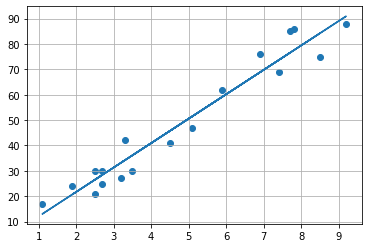

In [66]:
# Plotting the regression line
line = regs.coef_*train_x+regs.intercept_

# Plotting for the test data
plt.scatter(train_x, train_y)
plt.plot(train_x, line);
plt.grid()
plt.show()

In [67]:
# Predicting the test set 
pred=regs.predict(test_x)

# Comparing actual v/s predicted scores
df=pd.DataFrame({'Actual Score': test_y, 'Predicted score':pred})
df


,Actual Score,Predicted score
5,20,16.874397
21,54,48.611111
22,35,38.993925
18,67,61.113453
15,95,88.041574
8,81,82.271262
7,60,55.343141


In [69]:
#Predicting the target by giving new value
hour=[9.25]
new=regs.predict([hour])
print("Number of Hours = {}".format([hour]))
print("Predicted Score = {}".format(new[0]))


Number of Hours = [[9.25]]
Predicted Score = 91.407589223163


In [70]:
# Evaluating the model using mean squared error

from sklearn import metrics  
metrics.mean_absolute_error(test_y,pred)

4.468787262698274